In [0]:
!wget http://files.fast.ai/data/dogscats.zip                # downloading the dataset


Redirecting output to ‘wget-log’.


In [0]:
!unzip dogscats.zip                            #unzip the dataset ,each image has been preplaced in the repective folder and is ready to be trained no need to do the placing of image to repective class

Archive:  dogscats.zip
replace dogscats/sample/train/cats/cat.2921.jpg? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [0]:
from tensorflow.python.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense,Flatten        #importing needed libraries

In [0]:
mod=Sequential()
mod.add(ResNet50(include_top=False,pooling="avg",weights="imagenet"))  #using weights of imagenet classification challenge, include_top is set false so that we can add our new top with only two classes
mod.add(Dense(2,activation="softmax"))                                 #dense layer for output                 
mod.layers[0].trainable=False                         #setting initial layer to be false to render their weights unchanged only effect of our training will be on the added dense layer

In [0]:
mod.compile(optimizer="adam",                          # using admam as it is better than most of the other like sgd.
            loss="categorical_crossentropy",           #loss function
            metrics=["accuracy"])

In [0]:
from tensorflow.python.keras.applications.resnet50 import preprocess_input
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator
image_size=224                                                     #input image size for resnet is 224x224 pixel
data_generator=ImageDataGenerator(rescale=1./255)                  #keras works best if input is between 0 and 1
train_generator = data_generator.flow_from_directory(
        'dogscats/train',
        target_size=(image_size, image_size),
        batch_size=32)
valis_generator = data_generator.flow_from_directory(
        'dogscats/valid',
        target_size=(image_size, image_size),
        batch_size=24)

Found 23000 images belonging to 2 classes.
Found 2000 images belonging to 2 classes.


In [0]:
mod.fit_generator(train_generator,                                             #training with 33 epoch which is optimal 
                 validation_data=valis_generator,                              #model tend to overfit with epoch>35 on this dataset
                 steps_per_epoch=3,
                 validation_steps=1,
                 epochs=33)

Epoch 1/33
3/3 [==============================] - 9s 3s/step - loss: 0.5806 - acc: 0.6979 - val_loss: 0.9073 - val_acc: 0.5833
Epoch 2/33
3/3 [==============================] - 1s 368ms/step - loss: 0.7226 - acc: 0.6250 - val_loss: 0.9441 - val_acc: 0.5833
Epoch 3/33
3/3 [==============================] - 1s 353ms/step - loss: 0.3875 - acc: 0.7917 - val_loss: 0.9187 - val_acc: 0.5833
Epoch 4/33
3/3 [==============================] - 1s 351ms/step - loss: 0.3233 - acc: 0.8958 - val_loss: 0.8922 - val_acc: 0.5833
Epoch 5/33
3/3 [==============================] - 1s 349ms/step - loss: 0.2547 - acc: 0.9271 - val_loss: 1.0577 - val_acc: 0.5833
Epoch 6/33
3/3 [==============================] - 1s 350ms/step - loss: 0.2810 - acc: 0.8854 - val_loss: 0.9323 - val_acc: 0.5833
Epoch 7/33
3/3 [==============================] - 1s 354ms/step - loss: 0.2544 - acc: 0.8958 - val_loss: 0.9739 - val_acc: 0.5833
Epoch 8/33
3/3 [==============================] - 1s 354ms/step - loss: 0.2677 - acc: 0.8854 

3/3 [==============================] - 1s 360ms/step - loss: 0.3308 - acc: 0.8750 - val_loss: 0.9274 - val_acc: 0.5833
Epoch 21/33
3/3 [==============================] - 1s 360ms/step - loss: 0.1311 - acc: 0.9688 - val_loss: 0.9970 - val_acc: 0.5833
Epoch 22/33
3/3 [==============================] - 1s 361ms/step - loss: 0.1079 - acc: 0.9583 - val_loss: 0.9675 - val_acc: 0.5833
Epoch 23/33
3/3 [==============================] - 1s 355ms/step - loss: 0.1374 - acc: 0.9375 - val_loss: 0.9848 - val_acc: 0.5833
Epoch 24/33
3/3 [==============================] - 1s 357ms/step - loss: 0.1553 - acc: 0.9479 - val_loss: 1.0003 - val_acc: 0.5833
Epoch 25/33
3/3 [==============================] - 1s 359ms/step - loss: 0.1800 - acc: 0.9479 - val_loss: 0.9887 - val_acc: 0.5833
Epoch 26/33
3/3 [==============================] - 1s 354ms/step - loss: 0.1840 - acc: 0.9375 - val_loss: 1.0336 - val_acc: 0.5833
Epoch 27/33
3/3 [==============================] - 1s 358ms/step - loss: 0.0915 - acc: 0.9792 -

In [0]:
import os                                          #preparing data for visualization of predictions
lis=os.listdir("dogscats/test1")
s=[("dogscats/test1/"+a) for a in lis]

In [0]:
def read_and_prep_images(img_paths, img_height=224, img_width=224):
    imgs = [load_img(img_path, target_size=(img_height, img_width)) for img_path in img_paths]
    img_array = np.array([img_to_array(img) for img in imgs])
    output = preprocess_input(img_array)
    return(output)

In [0]:
k=read_and_prep_images(s[0:20])


In [0]:
pred=mod.predict(k)

[0.02538457 0.97461545]
dog


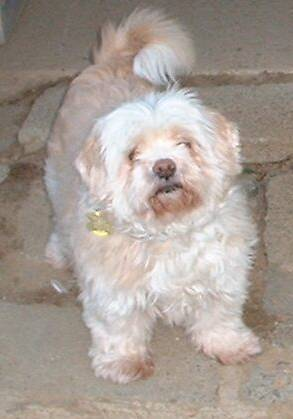




[0.00974791 0.99025214]
dog


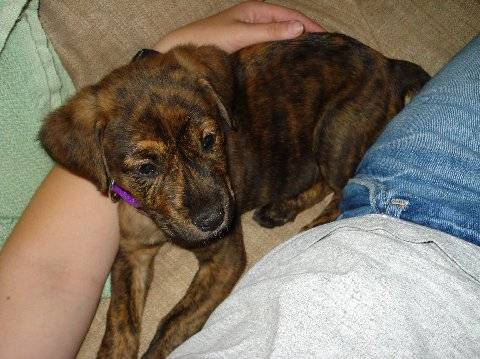




[9.9984097e-01 1.5905016e-04]
cat


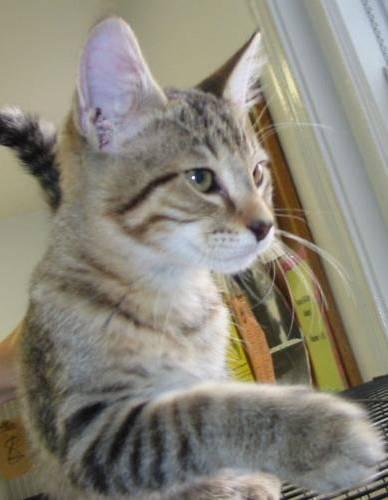




[0.00429138 0.9957086 ]
dog


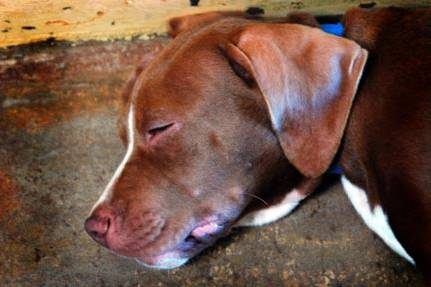




[9.9927932e-01 7.2068616e-04]
cat


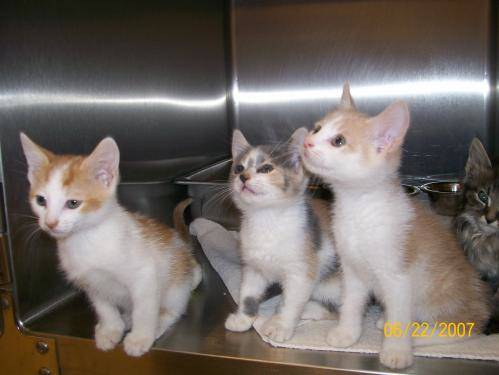




[0.9788911  0.02110895]
cat


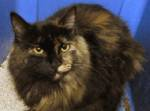




[0.02652736 0.9734726 ]
dog


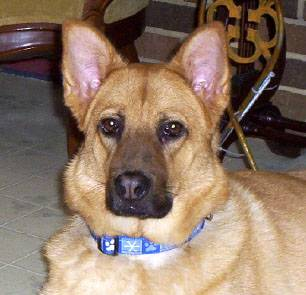




[3.1829437e-05 9.9996817e-01]
dog


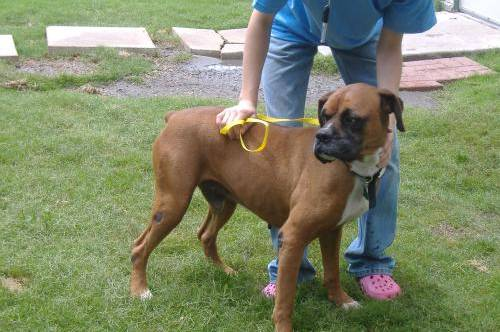




[9.9993086e-01 6.9168520e-05]
cat


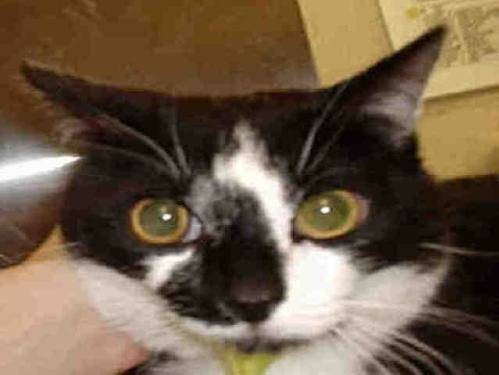




[5.6100130e-04 9.9943894e-01]
dog


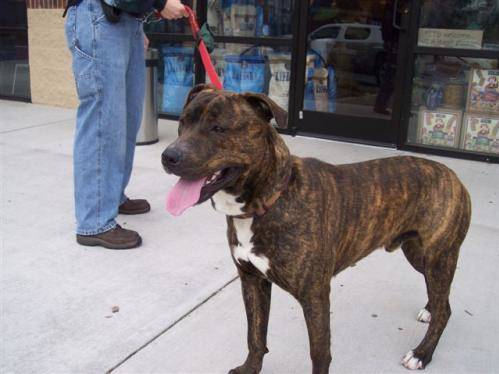




[9.6280774e-04 9.9903727e-01]
dog


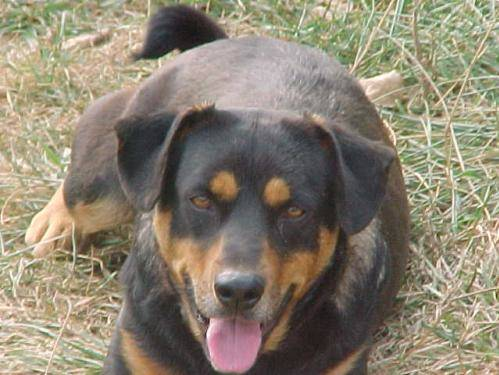




[0.00290698 0.99709296]
dog


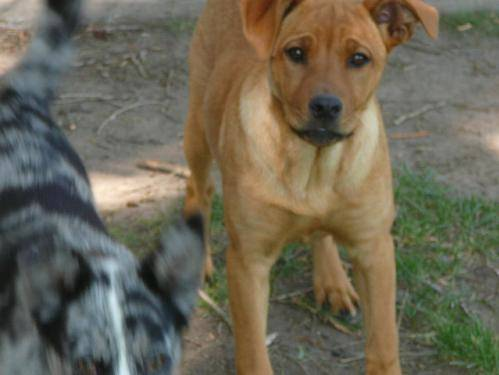




[9.9977750e-01 2.2257313e-04]
cat


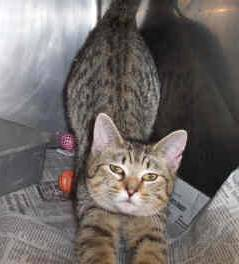




[4.4204757e-04 9.9955791e-01]
dog


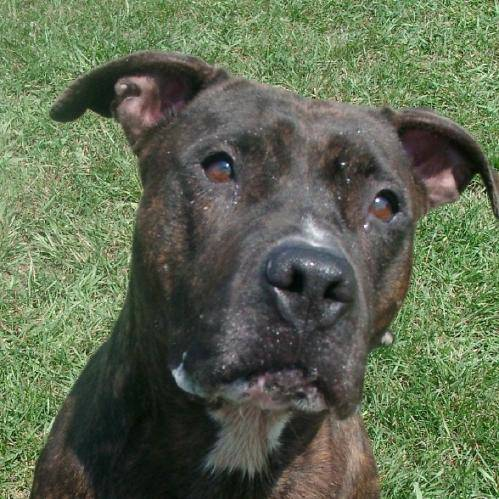




[9.9967861e-01 3.2139488e-04]
cat


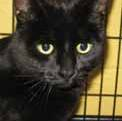




[2.0989189e-04 9.9979013e-01]
dog


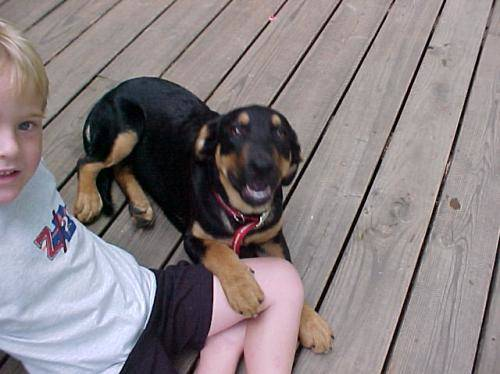




[0.00474842 0.99525154]
dog


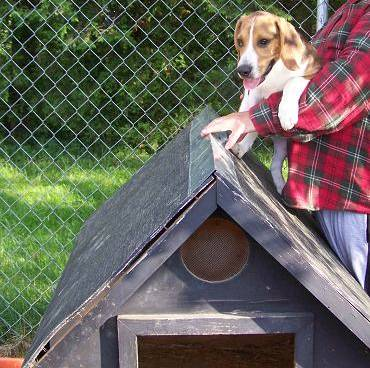




[0.0028813 0.9971187]
dog


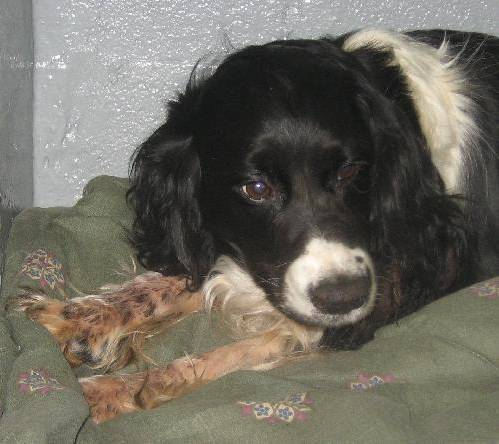




[4.3893172e-04 9.9956101e-01]
dog


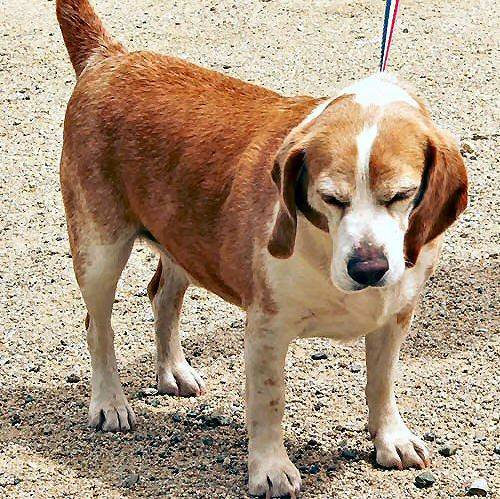




[0.00284502 0.99715495]
dog


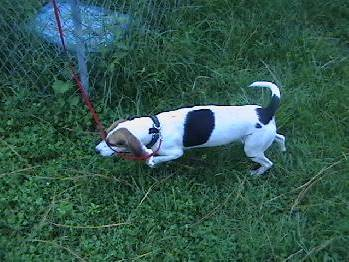

In [0]:
for a in range(20):
  print(pred[a])
  if(pred[a][0]>pred[a][1]):
    print("cat")
  else:
    print("dog")
  display(Image("dogscats/test1/"+lis[a]))
  print("\n\n")

In [0]:
# so we have made a model with accuracy of 97% as validation accuracy